# Edge Detection Algorithms
Most of these are spatial filters, ie, they are some sort of matrix multiplication with your image

There are some in frequency domain (Taking fourier and then doing a pass filter)

## Types of Edge Algorithms
1. Roberts Filter
    + Convolution Filter, 2x2 Kernel
    + Designed to approximate the gradients of an image
    + Has 2 operators, each are 90 degrees from each other (X and Y directions)
    + Designed to notice the diagonal edges (45 Degree angles)
1. Sobel Operator
    + Similar to Roberts, but as a 3x3 matrix
    + Final magnitude is root(Gx^2 + Gy^2), and you can use arctan to find directions
1. Schorr
    + Identify gradients in X and Y independently, put literally exactly the same as sobel
1. Prewitt
    + Same as Sobel, just kernel values are differnet
1. Farid
    + 2 PAIRS of kernels, one for interpolation (5x5 kernel) and one for differentiation(7x7 kernel)
1. Canny
    + Apply gaussian filter (Smooth the image and remove noise)
    + Finding intensity gradients (Use any of the above filters)
    + Non-Maximum Supression (To get major edges only)
    + Apply Double Threshold (Remove any remaining edge windows)
    + Edge Tracking by Hysteresis (Removing edges that are not that important)




## Links and Resources
- [PSNR](https://www.bing.com/search?q=psnr&PC=U316&FORM=CHROMN)
- [Quality Assessment Research Papers](https://ieeexplore.ieee.org/document/9454489)
- [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2022/08/comprehensive-guide-to-edge-detection-algorithms/)

In [1]:
from skimage import io, feature
from skimage.color import rgb2gray
from skimage.filters import roberts, sobel, scharr, prewitt, farid

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

from scipy import ndimage
import skimage.metrics

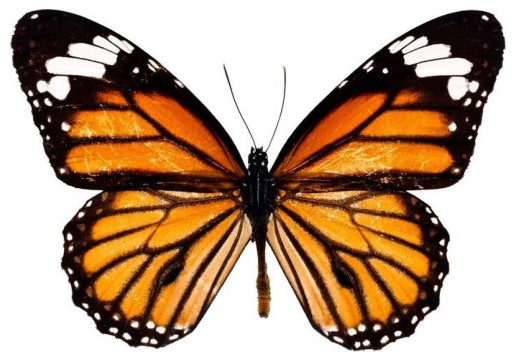

In [2]:
image = Image.open("./resources/Butterfly.jpg")

plt.imshow(image)
plt.axis('off')
plt.show()

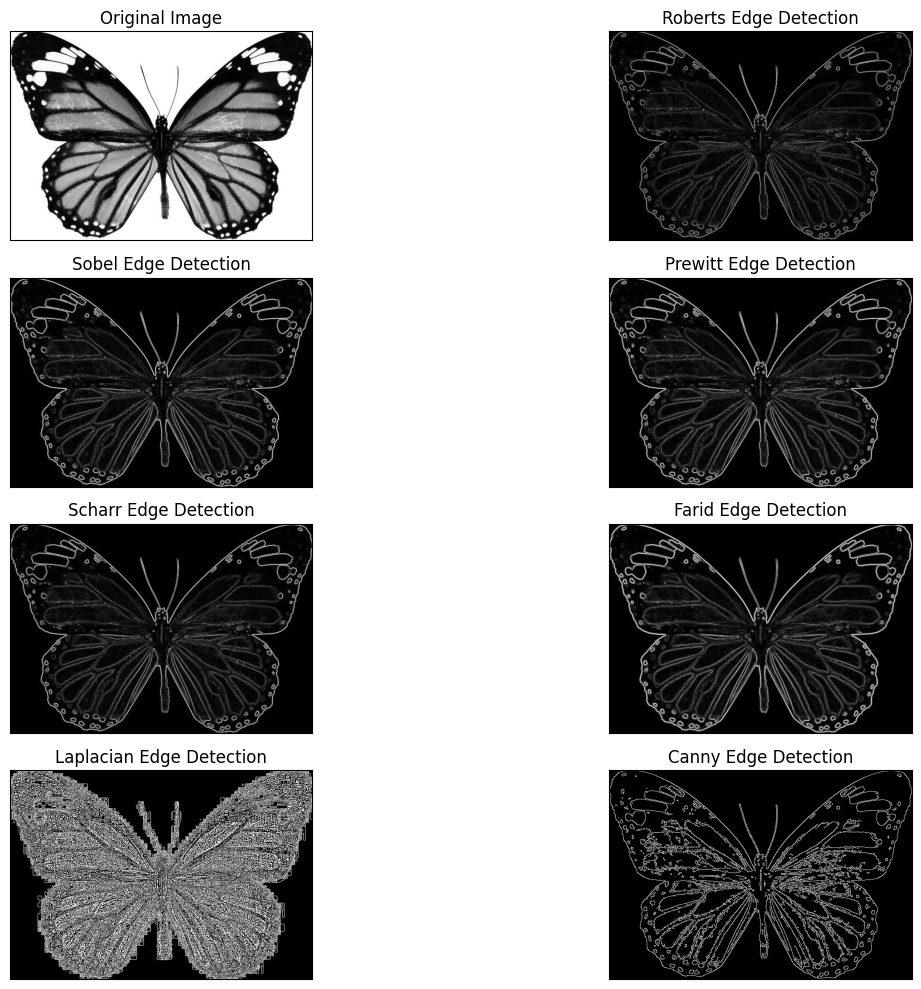

In [3]:
image = np.array(image.convert('L'))

# Roberts
# edge_roberts = ndimage.generic_gradient_magnitude(image, ndimage.sobel)
edge_roberts = roberts(image)

# Sobel
edge_sobel = sobel(image)

# Prewitt
edge_prewitt = prewitt(image)

#Scharr
edge_scharr = scharr(image)

#Farid
edge_farid = farid(image)

# Laplacian
edge_laplacian = ndimage.laplace(image)

# Canny
edge_canny = cv2.Canny(image, 100, 200) # 100 and 200 are the thresholds for double thresholing step


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(edge_roberts, cmap='gray')
ax[1].set_title('Roberts Edge Detection')
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(edge_sobel, cmap='gray')
ax[2].set_title('Sobel Edge Detection')
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[3].imshow(edge_prewitt, cmap='gray')
ax[3].set_title('Prewitt Edge Detection')
ax[3].set_xticks([])
ax[3].set_yticks([])

ax[4].imshow(edge_scharr, cmap='gray')
ax[4].set_title('Scharr Edge Detection')
ax[4].set_xticks([])
ax[4].set_yticks([])

ax[5].imshow(edge_farid, cmap='gray')
ax[5].set_title('Farid Edge Detection')
ax[5].set_xticks([])
ax[5].set_yticks([])

ax[6].imshow(edge_laplacian, cmap='gray')
ax[6].set_title('Laplacian Edge Detection')
ax[6].set_xticks([])
ax[6].set_yticks([])

ax[7].imshow(edge_canny, cmap='gray')
ax[7].set_title('Canny Edge Detection')
ax[7].set_xticks([])
ax[7].set_yticks([])

plt.tight_layout()
plt.show()


[]

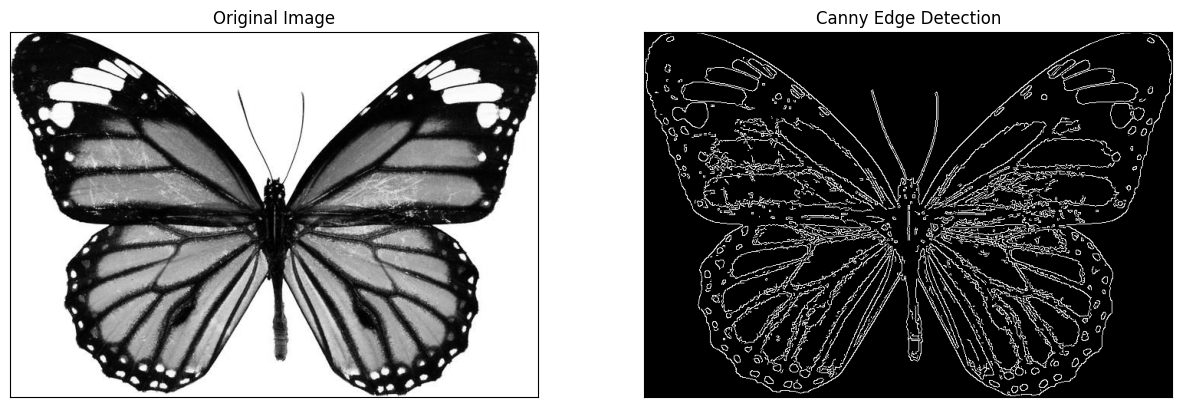

In [4]:
# Finding the perfect thresholds in canny is pretty hard. Lets try to automate it
sigma = 0.3
median = np.median(image)

lower = int(max(0, (1.0 - sigma) * median)) # Lower histogram value
upper = int(min(255, (1.0 + sigma) * median)) # Upper histogram value


edge_canny = cv2.Canny(image, lower, upper)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax = ax.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(edge_canny, cmap='gray')
ax[1].set_title('Canny Edge Detection')
ax[1].set_xticks([])
ax[1].set_yticks([])

# Advanced Filters
- [DoG](https://stackoverflow.com/questions/59516492/difference-of-gaussian-filtering-dog-doesnt-give-the-expected-results)
- [Laplacian](https://medium.com/jun94-devpblog/cv-3-gradient-and-laplacian-filter-difference-of-gaussians-dog-7c22e4a9d6cc)

[]

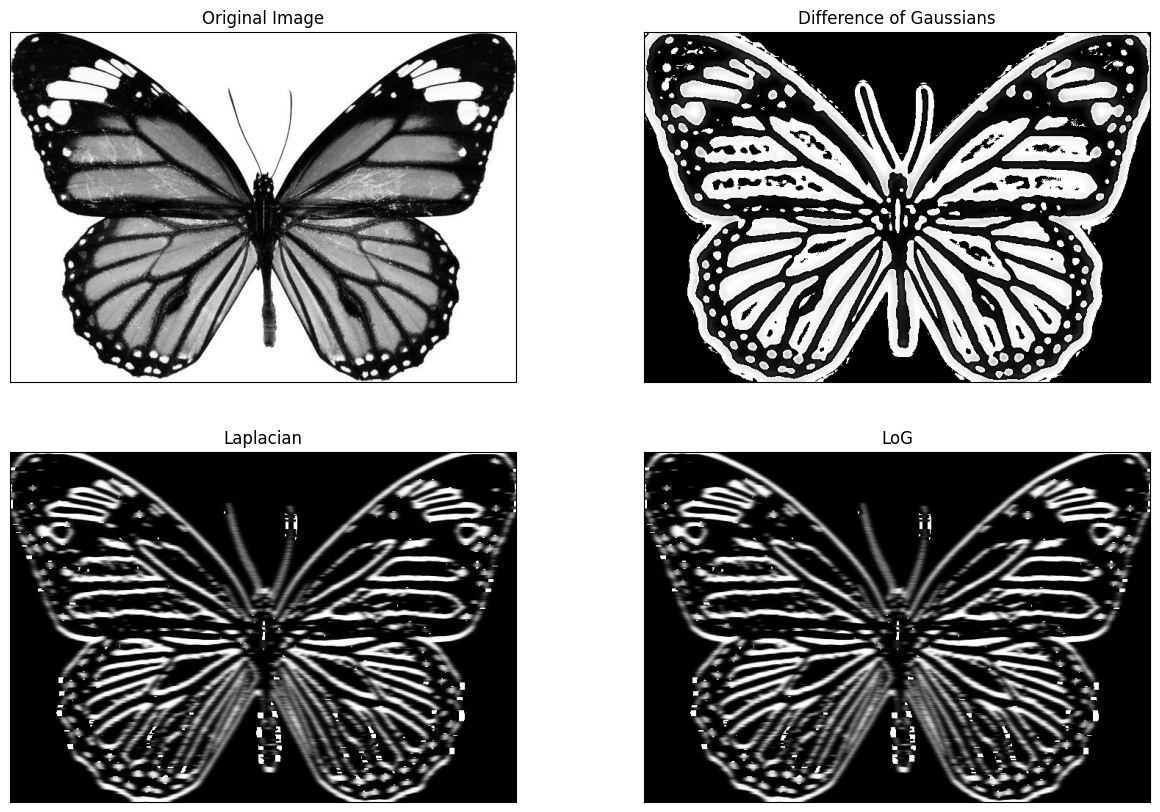

In [10]:
image = Image.open("./resources/Butterfly.jpg")
image = np.array(image.convert('L'))

# DoG Filter (Difference of Gaussians)
blurred = ndimage.gaussian_filter(image, 3)
very_blurred = ndimage.gaussian_filter(image, 5)
dog = very_blurred - blurred

# Laplacian
laplacian = ndimage.gaussian_laplace(image, 3)

# LoG
log = ndimage.gaussian_laplace(image, 3)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax = ax.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(dog, cmap='gray')
ax[1].set_title('Difference of Gaussians')
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(laplacian, cmap='gray')
ax[2].set_title('Laplacian')
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[3].imshow(log, cmap='gray')
ax[3].set_title('LoG')
ax[3].set_xticks([])
ax[3].set_yticks([])


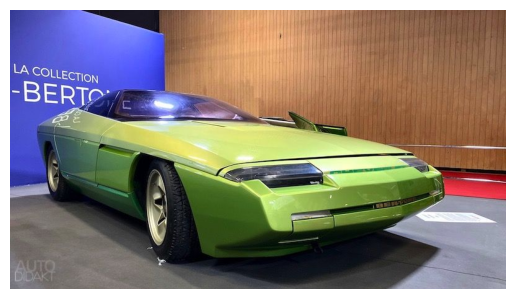

In [5]:
image = Image.open("./resources/Car.jpeg")

plt.imshow(image)
plt.axis('off')
plt.show()

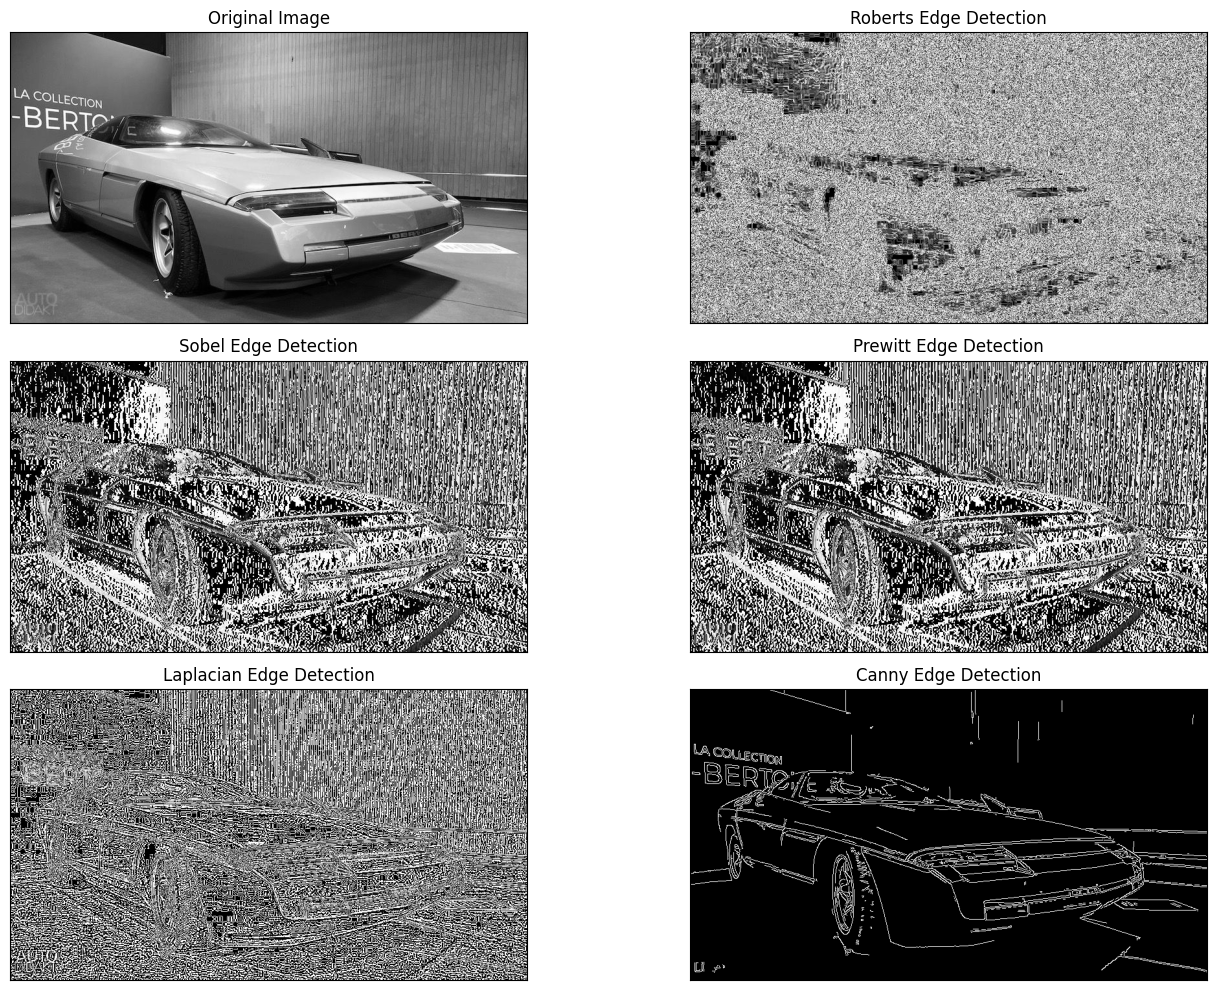

In [6]:
image = np.array(image.convert('L'))

# Roberts
edge_roberts = ndimage.generic_gradient_magnitude(image, ndimage.sobel)

# Sobel
edge_sobel = ndimage.sobel(image)

# Prewitt
edge_prewitt = ndimage.prewitt(image)

# Laplacian
edge_laplacian = ndimage.laplace(image)

# Canny
edge_canny = cv2.Canny(image,100,200)


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(edge_roberts, cmap='gray')
ax[1].set_title('Roberts Edge Detection')
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].imshow(edge_sobel, cmap='gray')
ax[2].set_title('Sobel Edge Detection')
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[3].imshow(edge_prewitt, cmap='gray')
ax[3].set_title('Prewitt Edge Detection')
ax[3].set_xticks([])
ax[3].set_yticks([])

ax[4].imshow(edge_laplacian, cmap='gray')
ax[4].set_title('Laplacian Edge Detection')
ax[4].set_xticks([])
ax[4].set_yticks([])

ax[5].imshow(edge_canny, cmap='gray')
ax[5].set_title('Canny Edge Detection')
ax[5].set_xticks([])
ax[5].set_yticks([])

plt.tight_layout()
plt.show()


In [7]:
# Analysis on the Quality of the Edge Detection Algorithms

## PSNR Evaluation

In [8]:
# Calculate the PSNR between the original image and the edge detected images
psnr_roberts = skimage.metrics.peak_signal_noise_ratio(image, edge_roberts)
psnr_sobel = skimage.metrics.peak_signal_noise_ratio(image, edge_sobel)
psnr_prewitt = skimage.metrics.peak_signal_noise_ratio(image, edge_prewitt)
psnr_laplacian = skimage.metrics.peak_signal_noise_ratio(image, edge_laplacian)
psnr_canny = skimage.metrics.peak_signal_noise_ratio(image, edge_canny)


print("PSNR Roberts:", psnr_roberts)
print("PSNR Sobel:", psnr_sobel)
print("PSNR Prewitt:", psnr_prewitt)
print("PSNR Laplacian:", psnr_laplacian)
print("PSNR Canny:", psnr_canny)

# Higher the PSNR Value, the better is the edge algorithm (Maybe)

PSNR Roberts: 6.586013847444949
PSNR Sobel: 6.387835261618617
PSNR Prewitt: 6.15719181195842
PSNR Laplacian: 6.2251710810827205
PSNR Canny: 5.989407305611016


## IoU (Intersection over Union)